In [1]:
data <- read.csv('./IMDB-Movie-Data.csv')

## 결측치 처리
- sample의 obj : population을 대표... 멀어지면 안 된다.
- Continuous
> - 분포를 보고 평균을 대체하든, 중위수로 대체하든...
> - 다른 변수들과의 관계를 봐서 더 정확한 값으로 대체

- Discrete
> - 

In [2]:
str(data) ## data type ... 변수 척도 ... factor: 명목척도, int 
# rank :
# year : 명목형... int지만 사실은 factor라서 factor로 바꿔줘야함
# missing value 처리
 ## continuous일 경우 : 
 ## discrete일 경우 : 
head(data)

'data.frame':	1000 obs. of  12 variables:
 $ Rank              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title             : Factor w/ 999 levels "(500) Days of Summer",..: 288 569 656 636 674 780 403 471 833 539 ...
 $ Genre             : Factor w/ 207 levels "Action","Action,Adventure",..: 12 86 196 93 8 8 117 109 3 75 ...
 $ Description       : Factor w/ 1000 levels "\"21\" is the fact-based story about six MIT students who were trained to become experts in card counting and s"| __truncated__,..: 111 539 881 614 221 520 135 122 279 241 ...
 $ Director          : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 266 519 392 106 137 641 123 559 265 449 ...
 $ Actors            : Factor w/ 996 levels "Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani",..: 185 737 419 659 972 650 810 314 154 456 ...
 $ Year              : int  2014 2012 2016 2016 2016 2016 2016 2016 2016 2016 ...
 $ Runtime..Minutes. : int  121 124 117 108 123 103 128 89 141 116 ...
 $ Rating            : num  8.1 

Rank,Title,Genre,Description,Director,Actors,Year,Runtime..Minutes.,Rating,Votes,Revenue..Millions.,Metascore
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40
6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42


In [4]:
data$Year = as.factor(data$Year)
str(data)

'data.frame':	1000 obs. of  12 variables:
 $ Rank              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Title             : Factor w/ 999 levels "(500) Days of Summer",..: 288 569 656 636 674 780 403 471 833 539 ...
 $ Genre             : Factor w/ 207 levels "Action","Action,Adventure",..: 12 86 196 93 8 8 117 109 3 75 ...
 $ Description       : Factor w/ 1000 levels "\"21\" is the fact-based story about six MIT students who were trained to become experts in card counting and s"| __truncated__,..: 111 539 881 614 221 520 135 122 279 241 ...
 $ Director          : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 266 519 392 106 137 641 123 559 265 449 ...
 $ Actors            : Factor w/ 996 levels "Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani",..: 185 737 419 659 972 650 810 314 154 456 ...
 $ Year              : Factor w/ 11 levels "2006","2007",..: 9 7 11 11 11 11 11 11 11 11 ...
 $ Runtime..Minutes. : int  121 124 117 108 123 103 128 89 141 116 ...
 $ Rating            

숫자형 int를 num으로 변경
> - 안 바꿔줘도 되지만 데이터 처리 과정에 에러가 날 수 있기에 변경

In [5]:
# install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/9h/vzls18sn1pvgfwfymvybqkvw0000gn/T//RtmprRSnYZ/downloaded_packages


In [6]:
library(ggplot2)

## EDA (시각화)
- bar plot vs. histogram
> - 변수 척도에 따라 달라진다.
>> - 명목형은 bar plot ... 떨어져 있는 이유 : count
>> - 연속형은 histogram ... 구간이 이어져 있어서

- aes : 미적인 부분을 담당
> - 변수 하나만 넣으면 됨
> - x=data$Revenue..Millions.

- 편향성(bias)을 고려해야함!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 128 rows containing non-finite values (stat_bin).”

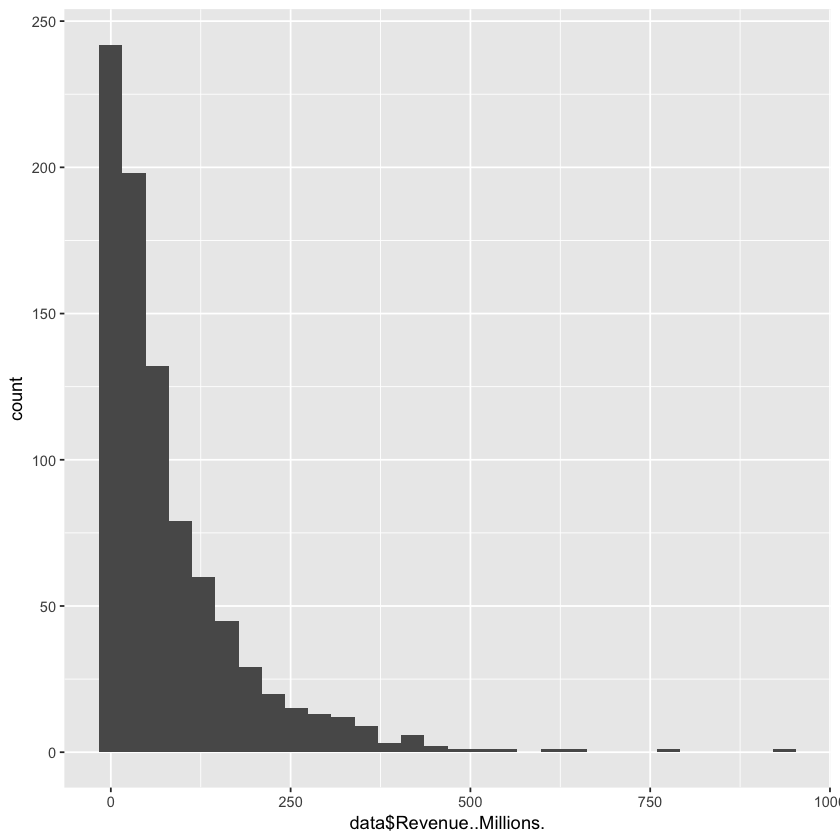

In [11]:
# ggplot(data, aes(x=data$Revenue..Millions.)) # 축그리기
ggplot(data, aes(x=data$Revenue..Millions.))+
    geom_histogram()

## outlier
- 중심에서 벗어난 애들
- 평균이 위험한 이유 : 극단치에 취약(민감)하다.
> - 평균에 영향을 받지 않는 중위수를 봐야 한다.

In [10]:
summary(data$Revenue..Millions.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   13.27   47.98   82.96  113.72  936.63     128 

- Median(47.98) <-> Mean(82.96)
> - 평균이 이미 오염되어 있음

- NA's : 128/1000 (12.8%)
> - 결측치를 평균으로 때려 넣으면 안 됨

- 직장인 월급 평균
> - Sampling Issue (bias)
>> - 9, 7급 + 비정규직 (공무원) // 주식시장에 상장된 중견기업부터 뽑음... (사기업)
> - obj : 공무원 월급을 올리기 위한 여론몰이

- 통계는 도구
> - 안에 숨어 있는 의미 파악만 해도 80%는 끝남

- 편향된 데이터는 Transform을 해줘야한다.
- 최대한 정규분포로 만들어 주어야 한다.
> - 그대로 쓰면 문제가 생긴다.
- log 를 씌워주어야 한다.
> - 간격을 좁히려고!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 129 rows containing non-finite values (stat_bin).”

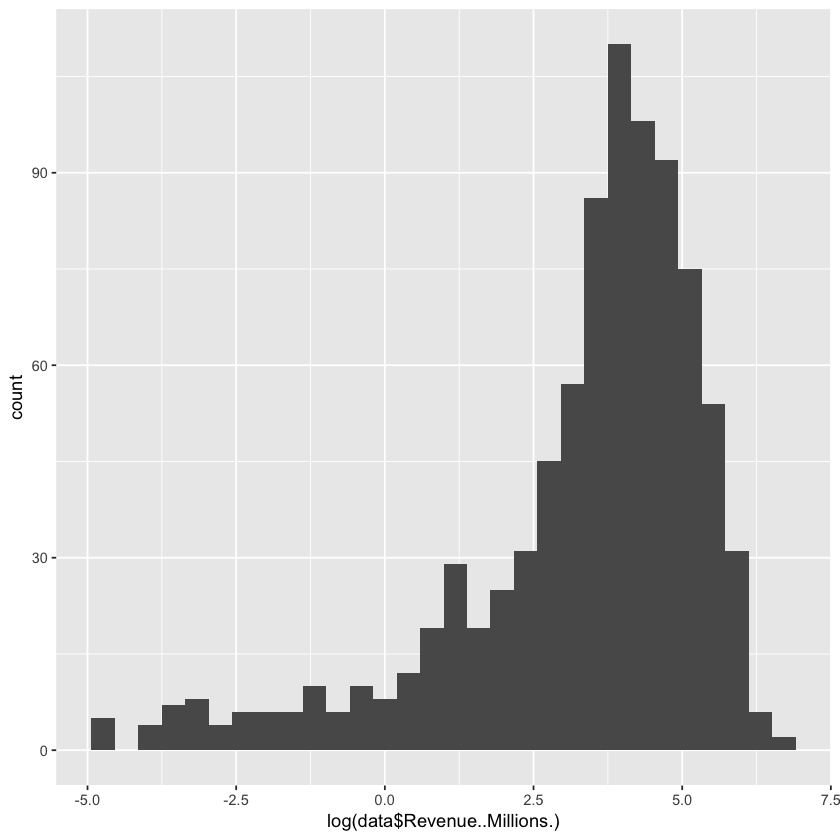

In [13]:
# ggplot(data, aes(x=data$Revenue..Millions.)) # 축그리기
# ggplot(data, aes(x=data$Revenue..Millions.))+
#     geom_histogram()

ggplot(data, aes(x=log(data$Revenue..Millions.)))+
    geom_histogram()

### qqnorm

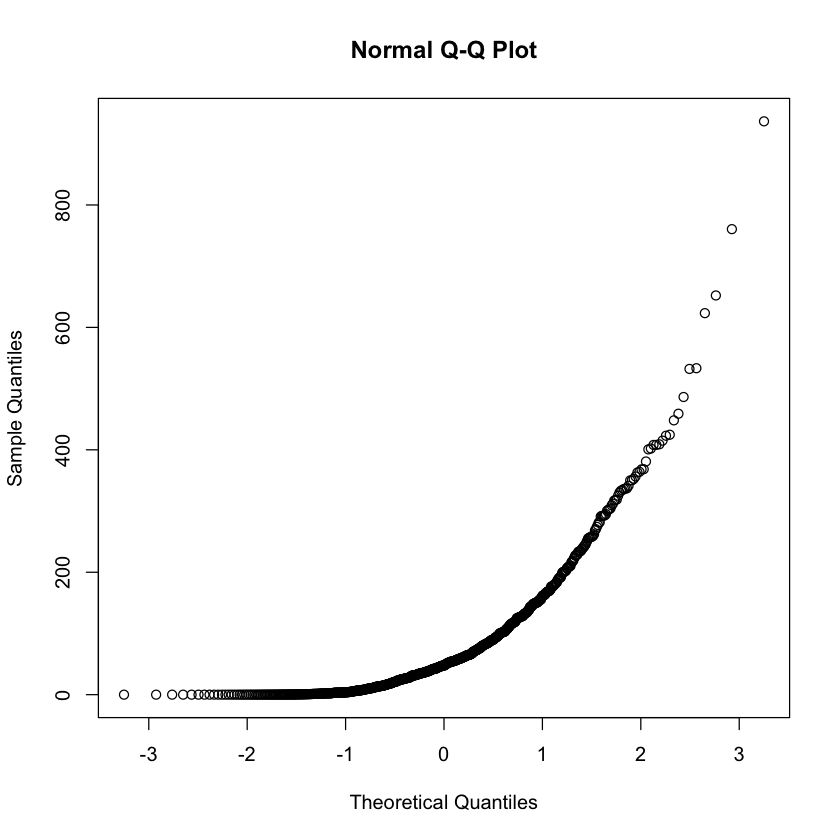

In [14]:
qqnorm(data$Revenue..Millions.)

- 그래프를 볼 떄는 축부터 봄
- 이론적인 분위수, 표본 분위수
> - 이론이 가르키는 것이랑 샘플이 가르키는 것
> - x축은 이론적(정규분포 이론을 따를 때)
>> - 실제랑 이론이랑 일치하면(정규분포를 따르면) 직선으로 간다.
> - 허나 직선으로 가지 않았다.
> - 즉, 정규분포와 다르다.

- 이게 정규선을 파악하는 기준이다.
> - 완벽하지 못하더라도 최대한 직선으로(정규분포로) 맞춰야 한다.

- 핵심은 정규성
> - 분포 자체는 정규성을 가져야 한다.

ERROR: Error in plot.window(...): 유한한 값들만이 'ylim'에 사용될 수 있습니다


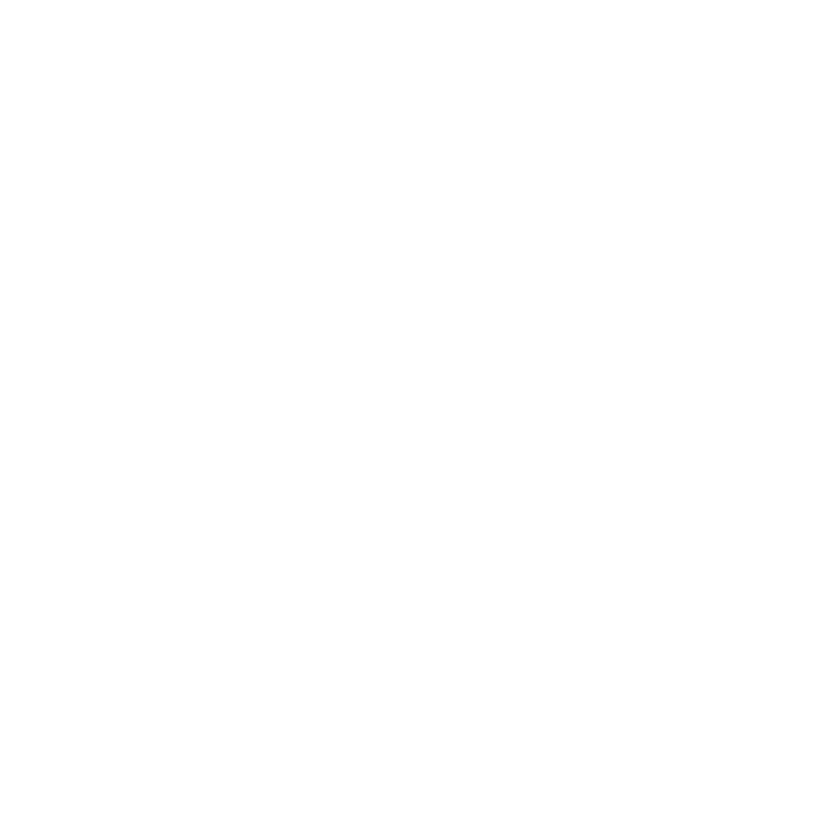

In [15]:
qqnorm(log(data$Revenue..Millions.))

In [17]:
summary(data$Revenue..Millions.)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   13.27   47.98   82.96  113.72  936.63     128 

- 오류가 생긴 이유
> - log 함수에 0이 못들어간다.
> - min: 0
- 새로운 변수를 만들 때, 무조건 raw data를 건드리지 않는다.
> - 0.0001을 추가해서 하든
> - 아니면 0을 없애든

#### 1

In [18]:
data$Revenue..Millions.2 = data$Revenue..Millions.+0.0001

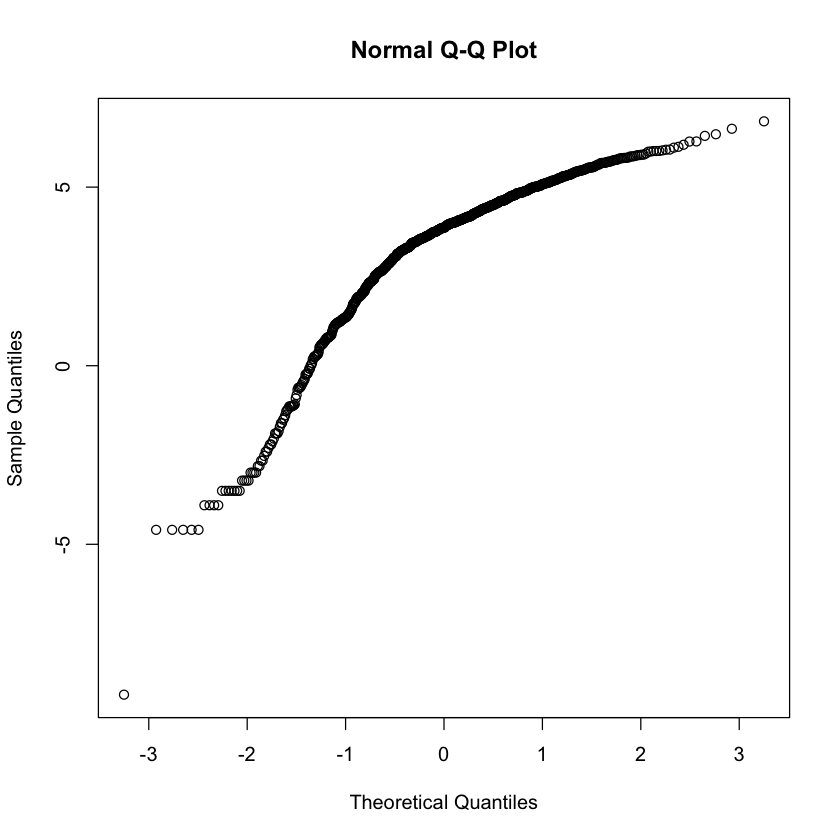

In [19]:
qqnorm(log(data$Revenue..Millions.2))

##### 2
- 0 제거

In [20]:
data2 = subset(data, data$Revenue..Millions. > 0)
str(data2)

'data.frame':	871 obs. of  13 variables:
 $ Rank               : int  1 2 3 4 5 6 7 9 10 11 ...
 $ Title              : Factor w/ 999 levels "(500) Days of Summer",..: 288 569 656 636 674 780 403 833 539 232 ...
 $ Genre              : Factor w/ 207 levels "Action","Action,Adventure",..: 12 86 196 93 8 8 117 3 75 81 ...
 $ Description        : Factor w/ 1000 levels "\"21\" is the fact-based story about six MIT students who were trained to become experts in card counting and s"| __truncated__,..: 111 539 881 614 221 520 135 279 241 803 ...
 $ Director           : Factor w/ 644 levels "Aamir Khan","Abdellatif Kechiche",..: 266 519 392 106 137 641 123 265 449 156 ...
 $ Actors             : Factor w/ 996 levels "Aamir Khan, Anushka Sharma, Sanjay Dutt,Boman Irani",..: 185 737 419 659 972 650 810 154 456 277 ...
 $ Year               : Factor w/ 11 levels "2006","2007",..: 9 7 11 11 11 11 11 11 11 11 ...
 $ Runtime..Minutes.  : int  121 124 117 108 123 103 128 141 116 133 ...
 $ Rating    

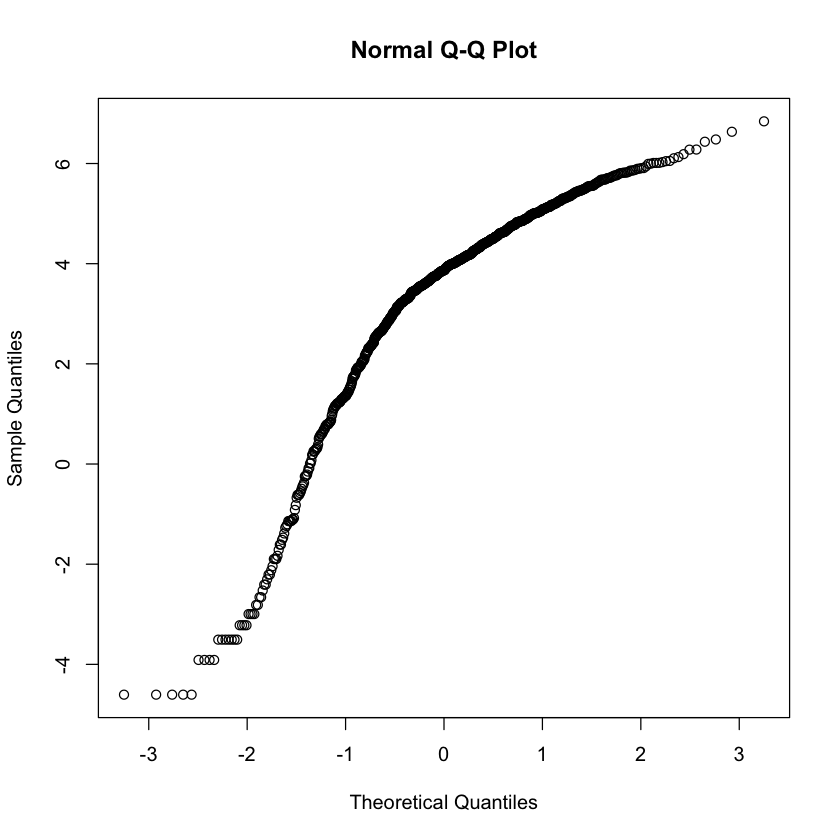

In [22]:
qqnorm(log(data2$Revenue..Millions.))

- 만족할 정도는 아니지만 아까보단 나아짐.
- 이런 식으로 하나씩 찾아가면서 다가가는 것임
- na, 0... 이게 왜 이렇게 나왔는지, 어떻게 접근(처리)해야하는지 고려해야 함,.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


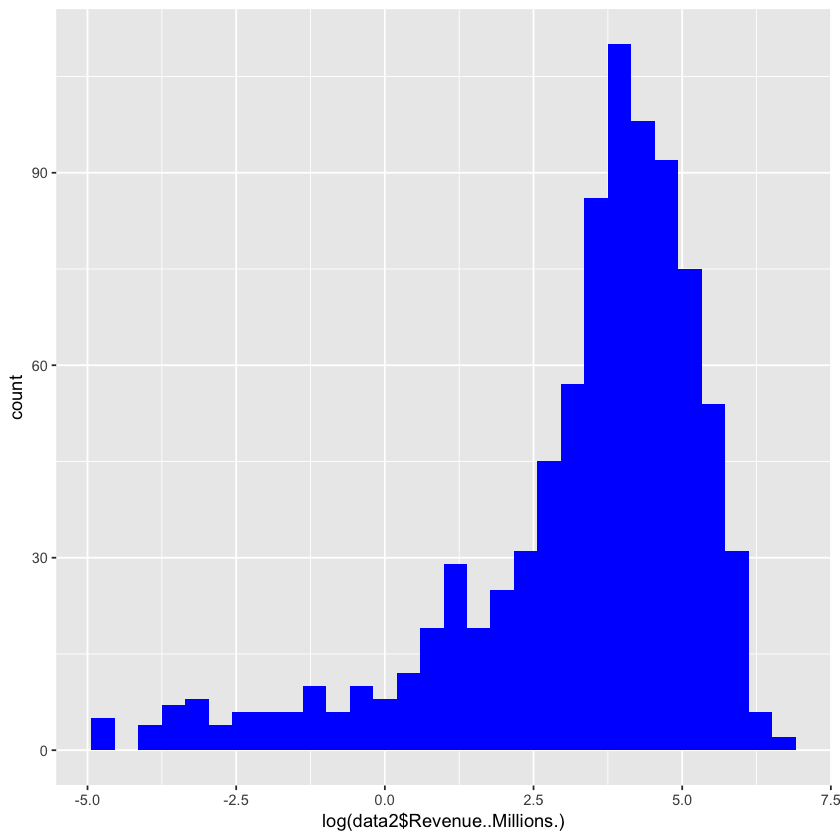

In [25]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.)))+
    geom_histogram(fill='blue')

### 누적형
- 년도별로 봄

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


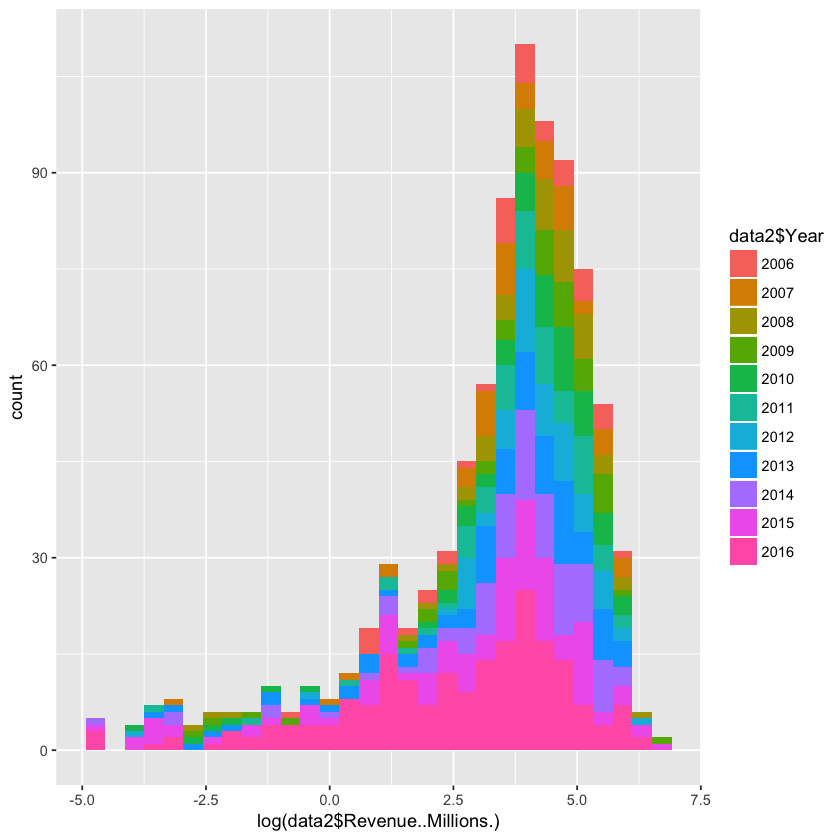

In [26]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.), fill=data2$Year))+
    geom_histogram()

### 년도별로 따로 나눠서

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


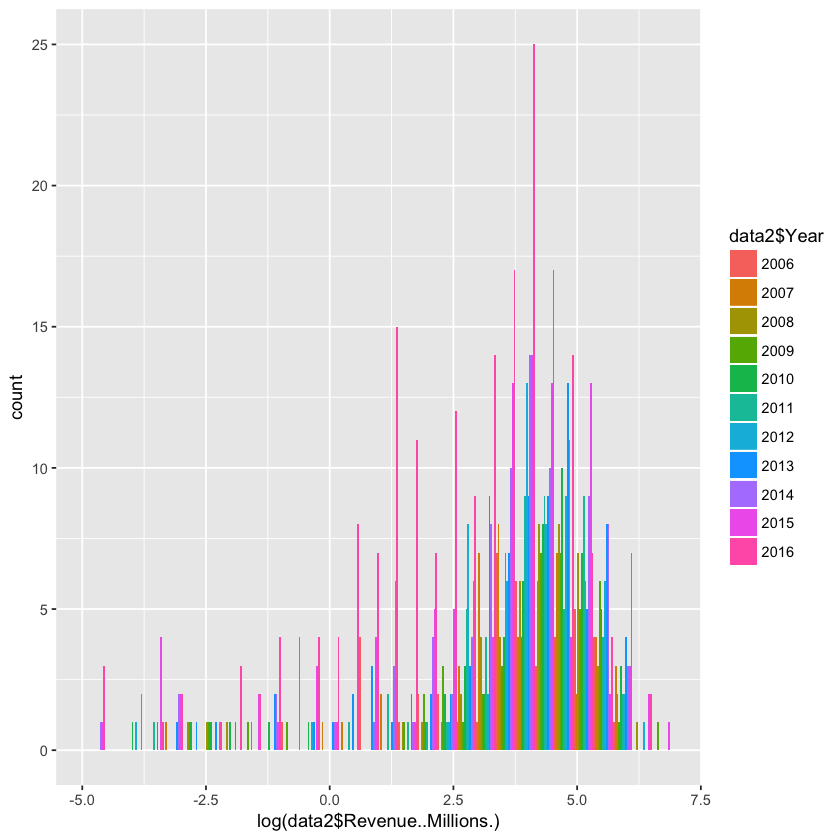

In [27]:
ggplot(data2, aes(x=log(data2$Revenue..Millions.), fill=data2$Year))+
    geom_histogram(position='dodge')

# 시각화의 핵심
- 좋은 시각화의 기준
> - 통계를 아무 것도 모르는 사장님이 봤을 때 '오~'할 정도로 나오는 게 좋은 시각화
> - 판단 : 사람들이 잘 이해했냐